# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
/
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
  pass
import tensorflow as tf

import cProfile

In [2]:
tf.executing_eagerly()

True

In [3]:
tf.__version__

'2.0.0'

In [4]:
x = [[2.]]
m = tf.matmul(x,x)
print("x matmul x = {}".format(m))

x matmul x = [[4.]]


In [5]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [6]:
#Broadcasting 
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [7]:
#element-wise multiplication
print(a*b)  

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [8]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [9]:
import numpy as np

In [10]:
c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [11]:
#Transfer a tensor to numpy array
print(a.numpy())

[[1 2]
 [3 4]]


In [12]:
w = tf.Variable([[2.0]])
with tf.GradientTape() as tape:
    loss = w * w * w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


In [87]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [88]:
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32)
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32)

#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [15]:
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28, 1)
(10000, 10)


## 方式1

In [123]:
#Build the model using Sequential

mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [124]:
mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)              

In [125]:
mnist_model.compile(optimizer=tf.keras.optimizers.Adam(),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])

In [126]:
mnist_model.fit(x_train,y_train,batch_size=128,epochs=20, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 3s 341us/sample - loss: 0.7692 - accuracy: 0.7571 - val_loss: 0.2866 - val_accuracy: 0.9140
Epoch 2/20
8000/8000 [==============================] - 2s 250us/sample - loss: 0.2599 - accuracy: 0.9241 - val_loss: 0.1852 - val_accuracy: 0.9375
Epoch 3/20
8000/8000 [==============================] - 2s 250us/sample - loss: 0.1652 - accuracy: 0.9528 - val_loss: 0.1372 - val_accuracy: 0.9595
Epoch 4/20
8000/8000 [==============================] - 2s 251us/sample - loss: 0.1218 - accuracy: 0.9632 - val_loss: 0.1181 - val_accuracy: 0.9655
Epoch 5/20
8000/8000 [==============================] - 2s 250us/sample - loss: 0.1019 - accuracy: 0.9675 - val_loss: 0.1141 - val_accuracy: 0.9655
Epoch 6/20
8000/8000 [==============================] - 2s 250us/sample - loss: 0.0755 - accuracy: 0.9761 - val_loss: 0.1047 - val_accuracy: 0.9720
Epoch 7/20
8000/8000 [==============================] - 2s 248us

In [127]:
mnist_model.evaluate(x_test,y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06101668152678758, 0.978]

In [33]:
x_test.shape

TensorShape([1000, 28, 28, 1])

In [35]:
mnist_model.predict(x_test[0:1])

array([[2.7537808e-06, 1.8767276e-05, 2.8195756e-05, 3.2132788e-04,
        2.8035001e-06, 2.4515793e-06, 1.2309952e-06, 9.9873370e-01,
        1.2407571e-05, 8.7650545e-04]], dtype=float32)

In [131]:
#Build the model using Model
inputs = tf.keras.Input(shape=(28,28,1),name="digits")
conv_1 = tf.keras.layers.Conv2D(32,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(64,[3,3],activation="relu")(conv_1)
max_pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv_2)
dropout_1 = tf.keras.layers.Dropout(0.25)(max_pool)
flatten = tf.keras.layers.Flatten()(dropout_1)
dense = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout_2 = tf.keras.layers.Dropout(0.25)(dense)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dense)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [128]:
#Build the model using Model
inputs = tf.keras.Input(shape=(None,None,1),name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10, activation='softmax')(ave_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [132]:
mnist_model_2.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               117

In [133]:
mnist_model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])
mnist_model_2.fit(x_train,y_train,batch_size=128,epochs=5, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 3s 337us/sample - loss: 0.5769 - accuracy: 0.8381 - val_loss: 0.2763 - val_accuracy: 0.9220
Epoch 2/5
8000/8000 [==============================] - 2s 252us/sample - loss: 0.1653 - accuracy: 0.9519 - val_loss: 0.1624 - val_accuracy: 0.9510
Epoch 3/5
8000/8000 [==============================] - 2s 253us/sample - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.1331 - val_accuracy: 0.9595
Epoch 4/5
8000/8000 [==============================] - 2s 264us/sample - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.1096 - val_accuracy: 0.9635
Epoch 5/5
8000/8000 [==============================] - 2s 255us/sample - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.1104 - val_accuracy: 0.9680


USE TF2.0

In [82]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [83]:
dataset = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_train,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [84]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [85]:
for epoch in range(5):
    
    for (batch, (images,labels)) in enumerate (dataset):
        
        with tf.GradientTape() as tape:
            
            logits = mnist_model(images,training=True)
            loss_value = loss(labels,logits)
            
        grads = tape.gradient(loss_value,mnist_model.trainable_variables)
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
        
    print("Epoch {} finishted".format(epoch))

Epoch 0 finishted
Epoch 1 finishted
Epoch 2 finishted
Epoch 3 finishted
Epoch 4 finishted


### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

和FNN相比，CNN使用了卷积核。这个的效果就是参数共享。参数共享带来两个好处：  
1、与FNN相比，显著减少了总的参数数量；  
2、共享的卷积核实现了平移不变性，即无论目标在图片中的哪个位置，卷积核都能扫描到它。

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

总的参数数量为： (5X5+1)X50=1300

#### 3. What are "local invariant" and "parameter sharing" ?

“local invariant”指的是局部特征不变化。每个卷积核表示一个特征，这个卷积核扫描过图片的每个位置，任何局部图像能匹配这个卷积核特征，都会被发现。所以CNN训练出来的模型，不会依赖这个特征在图片的位置。  
“parameter sharing”是参数共享，这个是相对于普通的全连接网络来说的。全连接网络，每个参数只对对应的上一层输入使用一次，所以参数非常多。卷积核的话，同一个卷积核会对上一层的所有数据都计算一遍，一个卷积核在计算时会被使用多次，被“共享”使用了。

#### 4. Why we use batch normalization ?

常见的激活函数，比如sigmoid，relu，tanh等，都是在0附近梯度较大，在远离0的范围时，梯度趋向于0，这样在进行梯度下降计算时效果不好。所以就需要在使用激活函数前对上一层的输出数据做处理，转换成为均值为0方差为1的数据，这样就可以落在激活函数梯度较大的范围，比较容易收敛。

#### 5. What problem does dropout try to solve ?

dropout是为了解决过拟合。dropout随机忽略部分参数不参与计算，就可以避免对特定的w值过分依赖，以此减少过拟合的问题。

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

错误。池化层虽然没有可训练的参数，但还是有计算的。梯度反向传播时，还是需要将梯度透过池化层传播到前面。总的思路是保持梯度之和不变：mean pooling是把梯度平均传递到前一层；max pooling是把梯度传播到max值对应的元素，其余元素得到的梯度为0.

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import glob, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # -1使用cpu，0就是使用gpu

C:\Users\myx\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Load the dataset. 

In [57]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np.eye(10)[y_train.squeeze()]
y_test = np.eye(10)[y_test.squeeze()]

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [58]:
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
# from keras.callbacks import TensorBoard
import time

In [59]:
model = Sequential()

# 第一个卷积层，32个卷积核，大小５x5，卷积模式SAME,激活函数relu,输入张量的大小
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='tanh',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='Same', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='Same', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters= 16, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.2))
# 全连接层,展开操作，
model.add(Flatten())
# 添加隐藏层神经元的数量和激活函数
model.add(Dense(128, activation='tanh'))    
model.add(Dropout(0.25))
# 输出层
model.add(Dense(10, activation='softmax'))  

In [60]:
model.compile(
            optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [62]:
train_history=model.fit(x=x_train,
                       y=y_train,
                       validation_split=0.2,
                       epochs=50,
                       batch_size=100,
                       shuffle=True,
                       verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 23s 575us/step - loss: 1.5215 - acc: 0.4568 - val_loss: 1.1595 - val_acc: 0.5909
Epoch 2/50
40000/40000 [==============================] - 22s 552us/step - loss: 1.1433 - acc: 0.5988 - val_loss: 1.0150 - val_acc: 0.6455
Epoch 3/50
40000/40000 [==============================] - 22s 558us/step - loss: 1.0300 - acc: 0.6416 - val_loss: 0.9316 - val_acc: 0.6755
Epoch 4/50
40000/40000 [==============================] - 23s 563us/step - loss: 0.9442 - acc: 0.6707 - val_loss: 0.9165 - val_acc: 0.6817
Epoch 5/50
40000/40000 [==============================] - 23s 563us/step - loss: 0.9037 - acc: 0.6846 - val_loss: 0.8925 - val_acc: 0.6916
Epoch 6/50
40000/40000 [==============================] - 22s 562us/step - loss: 0.8436 - acc: 0.7078 - val_loss: 0.8842 - val_acc: 0.6921
Epoch 7/50
40000/40000 [==============================] - 23s 564us/step - loss: 0.8083 - acc: 0.7228 - val_loss: 0.

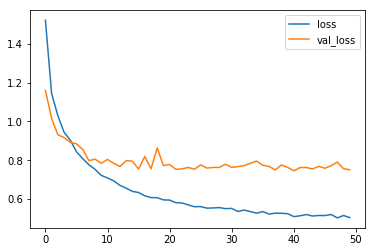

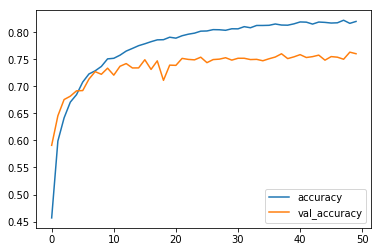

In [67]:
plt.plot(train_history.history['loss'], label='loss')
plt.plot(train_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(train_history.history['acc'], label='accuracy')
plt.plot(train_history.history['val_acc'], label='val_accuracy')
plt.legend()
plt.show()

In [68]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 231us/step


[0.7563554677009583, 0.7534]

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [69]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [77]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = a_prev_slice * W
    
    # Sum over s  
    Z = np.sum(s)
    
    # Add bias b to z.
    Z += np.squeeze(b)
    
    return Z

In [78]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [116]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = np.zeros((X.shape[0], X.shape[1] + 2*pad, X.shape[2] + 2*pad, X.shape[3]))
    X_pad[:, pad:X.shape[1] + pad, pad:X.shape[2] + pad, :] = X
    
    return X_pad

In [117]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [137]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev + 2*pad - f) / stride + 1)
    n_W = int((n_W_prev + 2*pad - f) / stride + 1)
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                  # loop over the batch of training examples
        a_prev_pad = A_prev_pad         # Select ith training example's padded activation
        for h in range(n_H):            # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = stride * h
            vert_end = stride * h + f
            
            for w in range(n_W):        # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = stride * w
                horiz_end = stride * w + f
                
                for c in range(n_C):    # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [138]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [146]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = stride * h
            vert_end = stride * h + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = stride * w + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [147]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.